In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel

The [Gillespie algorithm](https://en.wikipedia.org/wiki/Gillespie_algorithm) is an algorithm used for stochastic simulations of reactions systems. It is included in CModel as an alternative to `.integrate`, which does a numerical integration of the ODEs. Since the method can be computationally heavy, if available, it makes use of the optimisation library Numba, which dramatically improves performance. Here is an example with a simple SIR model.

In [4]:
# Population
N = 1000
# Infected at t=0
N_I = 10

cm = CModel.make_SIR(beta=0.3/N)

In [10]:
t = np.linspace(0, 100, 1000) # Time axis
tmax = t[-1] # Maximum time
y0 = np.array([N-N_I, N_I, 0.0]) # Starting state

gill_traj = cm.gillespie(tmax, y0, samples=100)

ode_traj = cm.integrate(t, y0)['y']

<IPython.core.display.Javascript object>


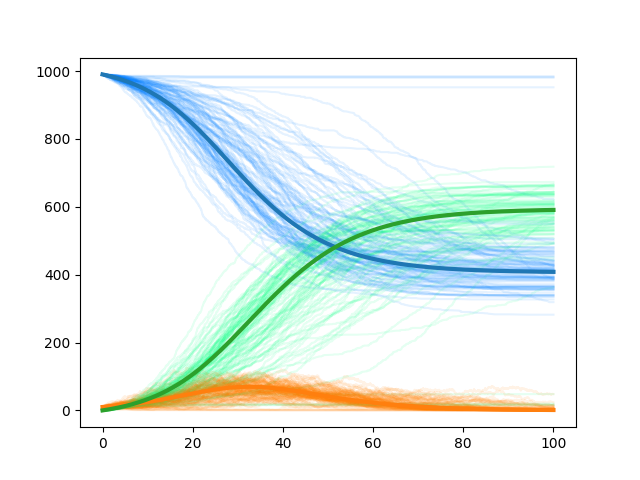

In [12]:
fig, ax = plt.subplots()

# Gillespie trajectories include their own time
gill_t = gill_traj['t']
gill_y = gill_traj['y']
for i, gt in enumerate(gill_t):
    ax.plot(gt, gill_y[i,:,0], c=(0.0, 0.5, 1.0, 0.1))
    ax.plot(gt, gill_y[i,:,1], c=(1.0, 0.5, 0.0, 0.1))
    ax.plot(gt, gill_y[i,:,2], c=(0.0, 1.0, 0.5, 0.1))
    
ax.plot(t, ode_traj, lw=3)